### Imports

In [243]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime as dt

from sklearn.linear_model import LinearRegression

In [244]:
pd.options.mode.chained_assignment = None

### Read Data

In [245]:
# Read Data
df = pd.read_excel('data.xlsx', 'Raw data')

### Review Data

In [246]:
df.head()

,Issue Type,Priority,Estimate (Story Points),Key,Status,Created,Resolved,Updated,Sprint
0,Analysis,Medium,5.0,APP-32582,Closed,2022-03-08 14:10:00,2022-04-25 16:56:00,2022-04-25 17:02:00,"TTPQD: 2022-03-25, TTPQD: 2022-04-08"
1,Story,Medium,1.0,APP-32453,Closed,2022-02-14 12:11:00,2022-03-15 09:36:00,2022-03-25 16:34:00,"TTPQD: 2022-02-25, TTPQD: 2022-03-11"
2,Story,Medium,5.0,APP-32452,Closed,2022-02-14 12:10:00,2022-03-15 09:33:00,2022-03-15 09:33:00,"TTPQD: 2022-02-25, TTPQD: 2022-03-11"
3,Story,Medium,8.0,APP-32450,Closed,2022-02-14 12:08:00,2022-03-15 09:05:00,2022-03-15 09:05:00,"TTPQD: 2022-02-25, TTPQD: 2022-03-11"
4,Story,Medium,3.0,APP-32430,Closed,2022-02-10 14:14:00,2022-04-25 18:03:00,2022-04-25 18:03:00,"TTPQD: 2022-03-25, TTPQD: 2022-04-08"


In [247]:
# Rename Story Points column to Estimate for reduction
df.rename(columns={'Estimate (Story Points)' : 'Estimate'}, inplace=True)
df.head()

,Issue Type,Priority,Estimate,Key,Status,Created,Resolved,Updated,Sprint
0,Analysis,Medium,5.0,APP-32582,Closed,2022-03-08 14:10:00,2022-04-25 16:56:00,2022-04-25 17:02:00,"TTPQD: 2022-03-25, TTPQD: 2022-04-08"
1,Story,Medium,1.0,APP-32453,Closed,2022-02-14 12:11:00,2022-03-15 09:36:00,2022-03-25 16:34:00,"TTPQD: 2022-02-25, TTPQD: 2022-03-11"
2,Story,Medium,5.0,APP-32452,Closed,2022-02-14 12:10:00,2022-03-15 09:33:00,2022-03-15 09:33:00,"TTPQD: 2022-02-25, TTPQD: 2022-03-11"
3,Story,Medium,8.0,APP-32450,Closed,2022-02-14 12:08:00,2022-03-15 09:05:00,2022-03-15 09:05:00,"TTPQD: 2022-02-25, TTPQD: 2022-03-11"
4,Story,Medium,3.0,APP-32430,Closed,2022-02-10 14:14:00,2022-04-25 18:03:00,2022-04-25 18:03:00,"TTPQD: 2022-03-25, TTPQD: 2022-04-08"


In [248]:
df.describe()

,Estimate
count,43.000000
mean,4.511628
std,2.566933
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,13.000000


In [249]:
df.dtypes

Issue Type            object
Priority              object
Estimate             float64
Key                   object
Status                object
Created       datetime64[ns]
Resolved      datetime64[ns]
Updated       datetime64[ns]
Sprint                object
dtype: object

In [250]:
df.isna().sum()

Issue Type    0
Priority      0
Estimate      1
Key           0
Status        0
Created       0
Resolved      0
Updated       0
Sprint        0
dtype: int64

### Figuring out NaN values and outliers

Count of NaN values: 0


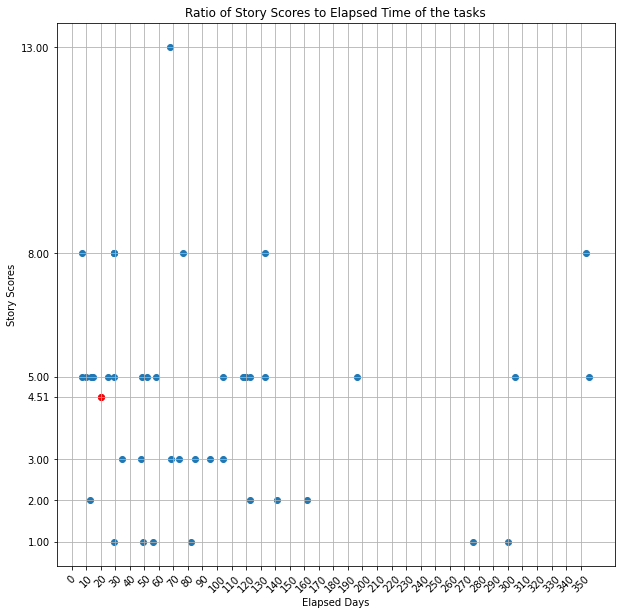

,Issue Type,Priority,Estimate,Key,Status,Created,Resolved,Updated,Sprint
23,Defect,Medium,13.0,APP-31613,Closed,2021-10-06 09:34:00,2021-12-13 08:23:00,2021-12-13 08:23:00,"TTPQD: 2021-10-22, TTPQD: 2021-11-05, TTPQD: 2..."
39,Story,Medium,1.0,APP-30576,Closed,2021-05-12 09:29:00,2022-03-08 11:21:00,2022-03-08 11:21:00,"TTPQD: 2021-06-18, TTPQD: 2021-07-02, TTPQD: 2..."
40,Story,Medium,8.0,APP-30190,Closed,2021-03-19 14:34:00,2022-03-08 11:20:00,2022-03-08 11:20:00,"TTPQD: 2021-08-13, TTPQD: 2021-08-27, TTPQD: 2..."
41,Story,Medium,5.0,APP-30176,Closed,2021-03-17 13:13:00,2022-03-08 11:20:00,2022-03-08 11:20:00,"TTPQD: 2021-07-16, TTPQD: 2021-08-13, TTPQD: 2..."
42,Story,Medium,1.0,APP-30149,Closed,2021-03-12 13:18:00,2021-12-13 08:23:00,2021-12-13 08:23:00,TTPQD: 2021-12-03
43,Story,Medium,5.0,APP-29874,Closed,2021-02-11 15:35:00,2021-12-13 08:23:00,2021-12-13 08:23:00,"TTPQD: 2021-07-30, TTPQD: 2021-08-13, TTPQD: 2..."


In [251]:
# Clear from NaN values
filled_with = df['Estimate'].mean()

# To create proper plot fill temporary NaN with average value of scores
df = df.fillna(filled_with)
score_work_intervals = pd.DataFrame(df['Estimate'])

print('Count of NaN values:', df.isna().sum().sum())

# Create dataframe of Estimate Score and Time interval is to be taken to complete task with this score
score_work_intervals['Difference'] = (df['Resolved'] - df['Created']) / np.timedelta64(1, 'D')

fig, axs = plt.subplots(figsize=(10, 10))

# Plot
plt.scatter(score_work_intervals['Difference'], score_work_intervals['Estimate'])

# Draw a point where NaN is detected
x_nan = score_work_intervals.loc[score_work_intervals['Estimate'] == filled_with, 'Difference']
y_nan = filled_with

plt.scatter(x_nan, y_nan, color='red')

# Set axes params
plt.xticks(np.arange(0, score_work_intervals['Difference'].max(), 10), rotation=45)
plt.yticks(score_work_intervals['Estimate'].unique())
axs.set_xlabel('Elapsed Days')
axs.set_ylabel('Story Scores')
axs.set_title('Ratio of Story Scores to Elapsed Time of the tasks')

plt.grid()

plt.show()

# We have clusters of outliers in this plot
score_work_intervals_outliers = df[(df['Estimate'] == 13) | (score_work_intervals['Difference'] > 260)]
# score_work_intervals_outliers.to_excel('score_work_intervals_outliers.xlsx')
score_work_intervals_outliers

### Plot of intervals of tasks.

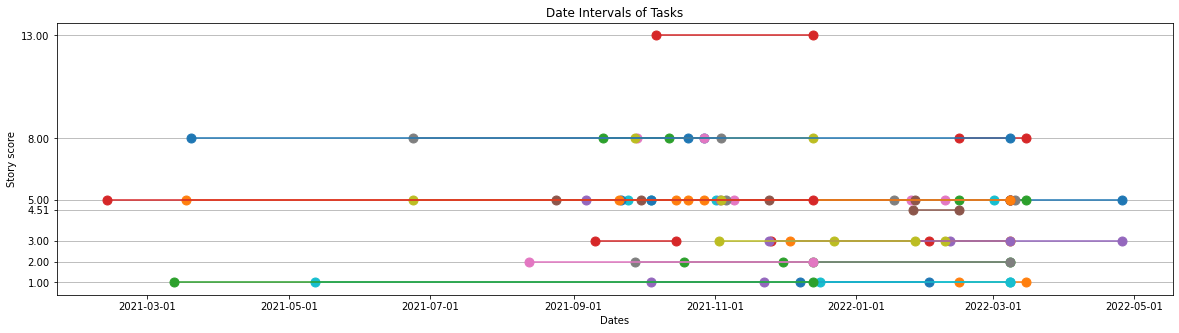

In [252]:
# Create dataframes for plots
created_resolved = df[['Created', 'Resolved', 'Estimate']]

# Plot
fig, axs = plt.subplots(figsize=(20, 5))

for index, row in created_resolved.iterrows():
    x_values = [row['Created'], row['Resolved']]
    y_values = [row['Estimate'], row['Estimate']]
    plt.plot(x_values, y_values, marker='o', markersize=9)

# plt.xticks(scores_created['Created'], rotation=45)
plt.yticks(created_resolved['Estimate'].unique())

axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

axs.set_title('Date Intervals of Tasks')
axs.set_xlabel('Dates')
axs.set_ylabel('Story score')

plt.grid(axis = 'y')

plt.show()

### Forecast

In [253]:
# Get a sample
elapsed_days_sample = score_work_intervals.drop('Estimate', axis=1)['Difference']
elapsed_days_sample.head()

# Get stastical variables
mean = np.round(elapsed_days_sample.mean(), 2)
median = np.round(elapsed_days_sample.median(), 2)
sd = np.round(elapsed_days_sample.std(), 2)

min_time = np.round(elapsed_days_sample.min(), 2)
max_time = np.round(elapsed_days_sample.max(), 2)

n = len(elapsed_days_sample)
c = 1.96 # 95% confidence

# Calculating confidence bounds
min_confidence_interval = np.round(mean - sd * c / np.sqrt(n), 2)
max_confidence_interval = np.round(mean + sd * c / np.sqrt(n), 2)

# Output
print('Mean:', mean)
print('Median:', median)
print('Standart deviation:', sd)
print('Min. time:', min_time)
print('Max. time:', max_time)
print('N:', n)
print(f'Confidence Interval ({min_confidence_interval}; {max_confidence_interval})')

Mean: 98.04
Median: 71.1
Standart deviation: 92.63
Min. time: 7.11
Max. time: 355.92
N: 44
Confidence Interval (70.67; 125.41)


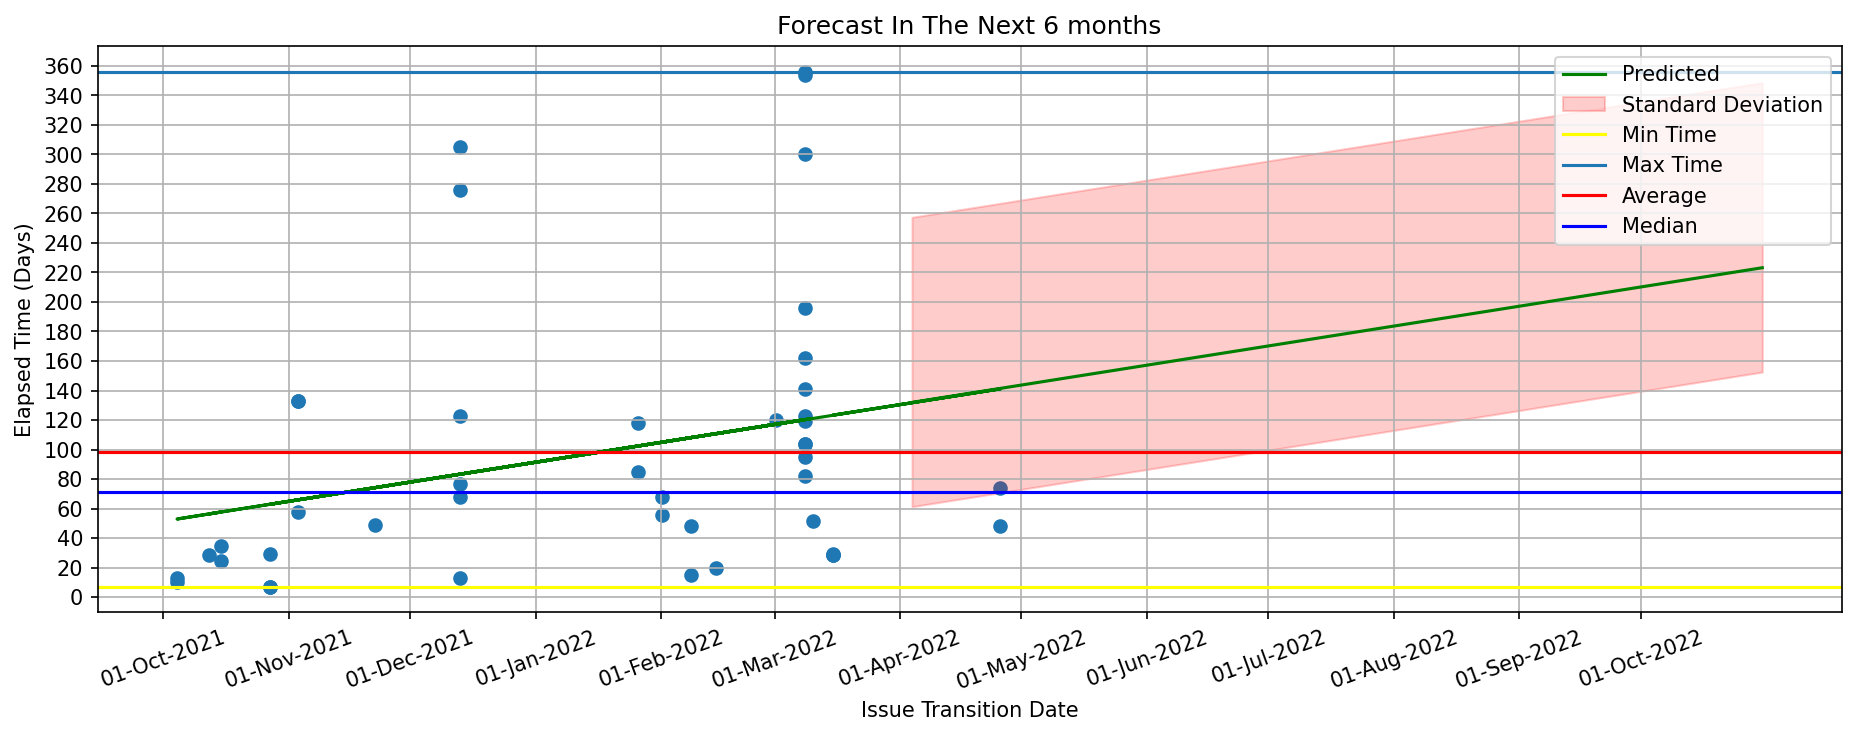

In [254]:
elapsed_resolved = score_work_intervals.drop('Estimate', axis=1)
elapsed_resolved['Resolved'] = df['Resolved']
# print(elapsed_resolved.head())

fig, axs = plt.subplots(figsize=(15, 5), dpi=150)

# Get starting and ending dates to make date range
start_date = elapsed_resolved.min()['Resolved']
end_date = elapsed_resolved.max()['Resolved'] + np.timedelta64(6, 'M')

# Oct/2021 - Oct/2022 range of cycle
given_date_range = pd.date_range(start=start_date - np.timedelta64(1, 'M'), end=end_date, freq='M') + np.timedelta64(1, 'D')
future_date_range = pd.date_range(start='1/Apr/2022', end='1/Nov/2022', freq='W') + np.timedelta64(1, 'D')

xticks_count = len(half_year_range)

# Draw given issues
axs.scatter(elapsed_resolved['Resolved'], elapsed_resolved['Difference'])

# --- Linear Regression ---

# Conver dates into numeric values
current_dates = pd.to_datetime(elapsed_resolved['Resolved']).map(dt.datetime.toordinal)
future_dates = pd.to_datetime(future_date_range).map(dt.datetime.toordinal)

# Reshaping into model-acceptable format
x_train = np.array(current_dates).reshape(-1, 1)
y_train = np.array(elapsed_resolved['Difference']).reshape(-1, 1)

# Using forecasting date range
x_future = np.array(future_dates).reshape(-1, 1)

# Fitting
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

# For drawing averaging line
y_pred = linear_regression.predict(x_train)

# For drawing foresting predictional line
y_pred_future = linear_regression.predict(x_future)

# Draw lines
axs.plot(elapsed_resolved['Resolved'], y_pred, color='green')
axs.plot(future_date_range, y_pred_future, color='green', label='Predicted')

# Draw confidence interval for forecusting
axs.fill_between(future_date_range,
                 pd.Series(y_pred_future.reshape(y_pred_future.shape[0])) - min_confidence_interval,
                 pd.Series(y_pred_future.reshape(y_pred_future.shape[0])) + max_confidence_interval,
                 alpha=0.2,
                 color='red',
                 label='Standard Deviation')

# Draw minimum and maximum elapsed time that have been noticed
axs.axhline(y=min_time, color='yellow', label='Min Time')
axs.axhline(y=max_time, label='Max Time')

# Draw average and median values
axs.axhline(y=mean, color='red', label='Average')
axs.axhline(y=median, color='blue', label='Median')

# Set params for the figure
axs.set_ylabel('Elapsed Time (Days)')
axs.set_xlabel('Issue Transition Date')
axs.set_title('Forecast In The Next 6 months')

plt.yticks(np.arange(0, np.round(max_time) + 20, 20))
plt.xticks(given_date_range, rotation=20)

axs.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))

plt.legend(fontsize=10, loc='upper right')
plt.grid()

plt.show()